### Partie 1 sur les cours OC

In [1]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

# choix du nombre de composantes à calculer
n_comp = 6

In [2]:
# import de l'échantillon
data = pd.read_csv("data/my_courses.csv",decimal=".",index_col=0)

In [4]:
# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[["inscription","progression","duree","difficulte","nbChapitres","nbEvaluations"]]

In [5]:
# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data["idCours"] # ou data.index pour avoir les intitulés
features = data.columns

In [6]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [7]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=6)

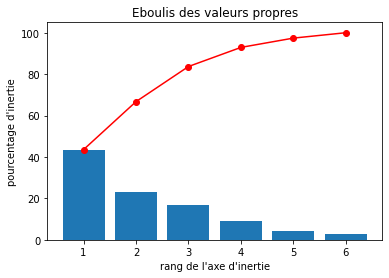

In [8]:
# Eboulis des valeurs propres
display_scree_plot(pca)

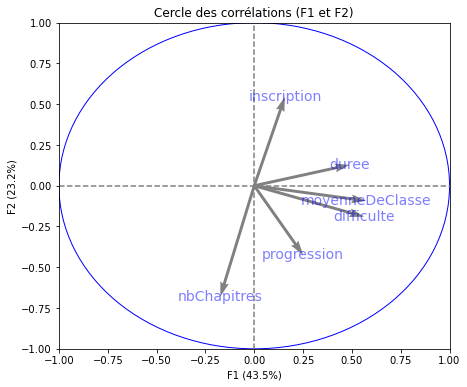

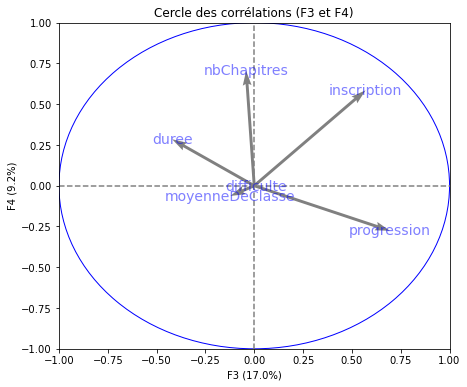

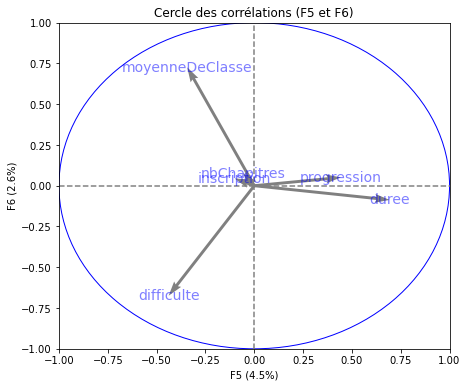

In [9]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

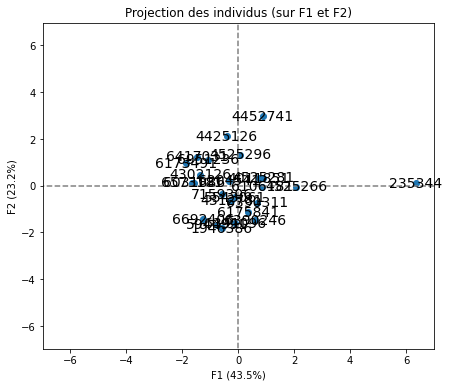

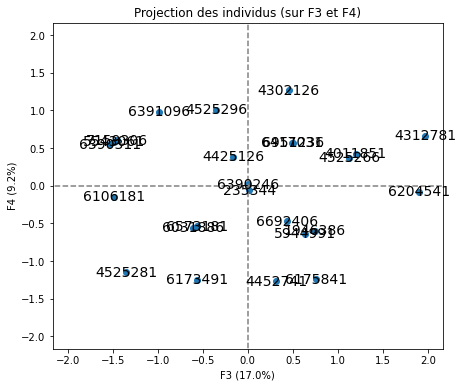

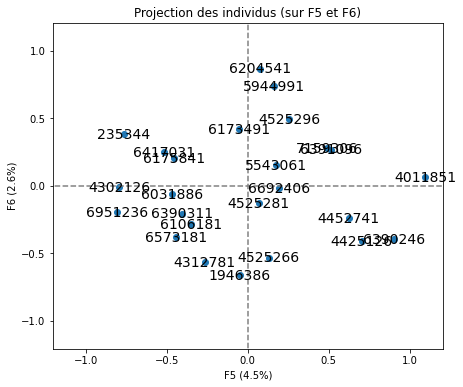

In [10]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

### Partie 2 sur les données mystères

In [14]:
import pandas as pd
from sklearn import decomposition, preprocessing
from functions import *


# choix du nombre de composantes à calculer
n_comp = 3

In [15]:
# import de l'échantillon
data = pd.read_csv("data/mystery.csv")
X = data.values

In [16]:
# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité. 
# On se contente juste de centrer les données, ce qui est obligatoire pour une ACP.
X = preprocessing.StandardScaler(with_std=False).fit_transform(X)

In [17]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components= n_comp)
pca.fit(X)

PCA(n_components=3)

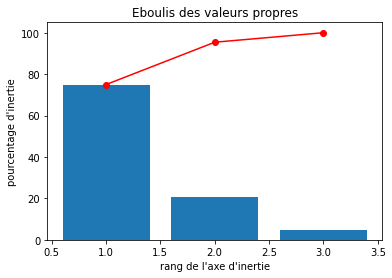

In [18]:
# Eboulis des valeurs propres
display_scree_plot(pca)

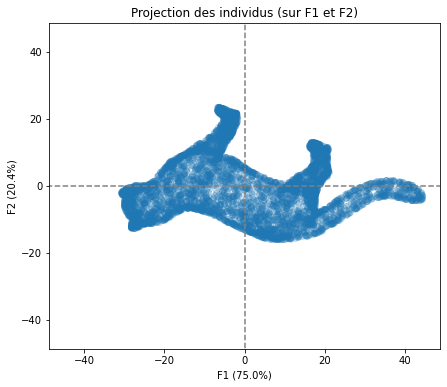

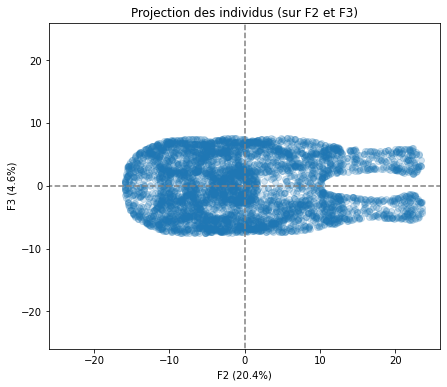

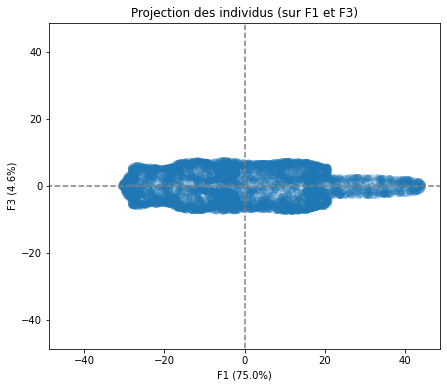

In [19]:
# projection des individus
X_projected = pca.transform(X)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2),(0,2)], alpha = 0.2)

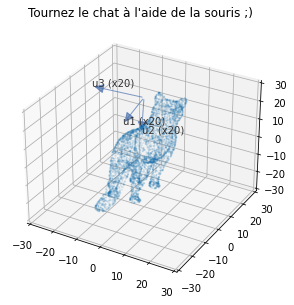

In [21]:
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('auto')
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
ax.set_zlim(-30,30)
fig.tight_layout()
x, y, z = X.T
ax.scatter(x, y, z, alpha = 0.1, s=1)
plt.title("Tournez le chat à l'aide de la souris ;)")

# Affichage des vecteurs propres (axes principaux d'inertie)
pcs = pca.components_
for i in range(3):
    eigen_vector_x20 = pcs[i] * 20
    eigen_vector = Arrow3D([0, eigen_vector_x20[0]], [0, eigen_vector_x20[1]],[30, 30+eigen_vector_x20[2]], mutation_scale=20, lw=1, arrowstyle="-|>", color="#4c72b0", alpha=.7)
    ax.add_artist(eigen_vector)
    ax.text3D(eigen_vector_x20[0],eigen_vector_x20[1],30+eigen_vector_x20[2],"u{} (x20)".format(i+1), color="#333333")

plt.show()

### Partie 3 sur bag of words

In [24]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing 
from functions import *
# choix du nombre de composantes à calculer
n_comp = 50

In [25]:
# import de l'échantillon et des informations relatives aux cours
data = pd.read_csv('data/bag_of_words.csv', index_col = 0)
courses_info = pd.read_csv('data/courses_info.csv',index_col = 0)

In [26]:
# Theme du ou des parcours auxquels appartient le cours (data, developpement, marketing, etc.)
theme = [courses_info.loc[course_id, "theme"] for course_id in data.index]

# préparation des données pour l'ACP
X = data.values
features = data.columns

In [27]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [28]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=50)

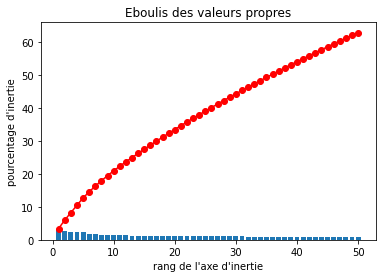

In [29]:
# Eboulis des valeurs propres
display_scree_plot(pca)

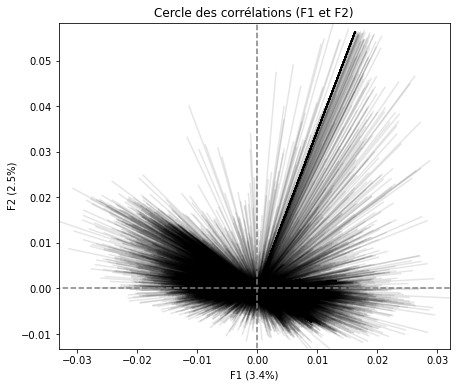

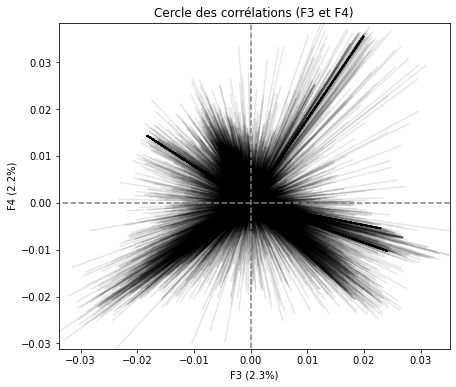

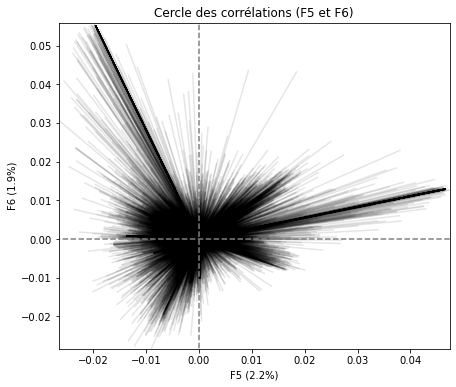

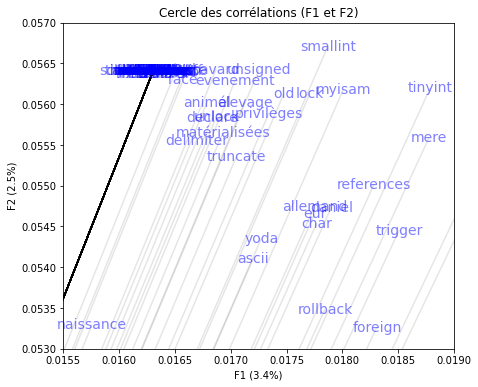

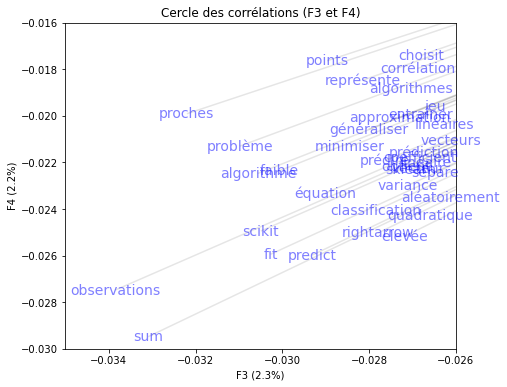

In [30]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)])
display_circles(pcs, n_comp, pca, [(0,1)], lims=[.0155, .019, 0.053, .057], labels = np.array(features))
display_circles(pcs, n_comp, pca, [(2,3)], lims=[-.035, -.026, -.03,-.016], labels = np.array(features))

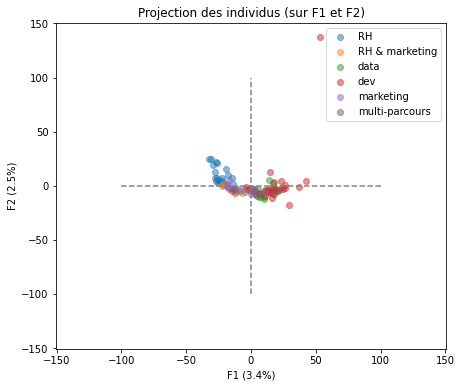

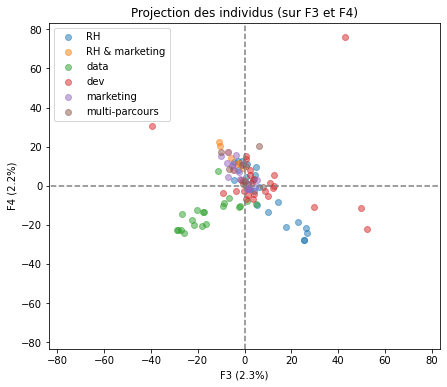

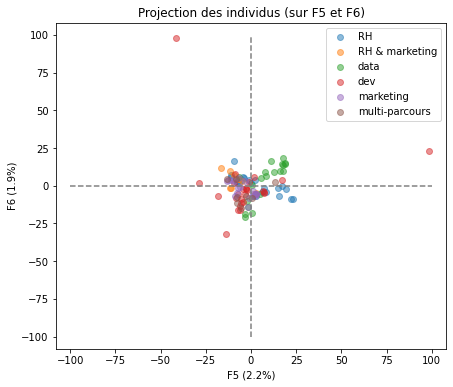

In [32]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = theme, alpha = 0.5)